In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

            
class mPerceptron:
    
    def __init__(self, i, h, o, a):
        self.i = i
        self.h = h
        self.o = o
        self.a = a
        self.Wih=np.random.rand(self.i,self.h)
        self.Who=np.random.rand(self.h, self.o)
        #input, output, hidden node, weight
        
    def step_func(self, x):
        return 1/(1+np.exp(-x))
        
    def train(self, inputs, target):
        I=np.array(inputs, ndmin=2)
        T=np.array(target, ndmin=2)
                
        hsum=np.dot(I, self.Wih)
        H=self.step_func(hsum)
        osum=np.dot(H,self.Who)
        Y=self.step_func(osum)
        
        delta=T-Y
        hdelta=np.dot(delta, self.Who.T)
        
        self.Who += self.a*np.dot(H.T, delta*Y*(1-Y))
        self.Wih += self.a*np.dot(I.T, hdelta*H*(1-H))
                
    def test(self, inputs):
        I=np.array(inputs, ndmin=2)
        
        hsum=np.dot(I, self.Wih)
        H=self.step_func(hsum)
        osum=np.dot(H,self.Who)
        Y=self.step_func(osum)
        
        return Y

In [2]:
iris=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)

#name을 변수로 변경
temp=pd.get_dummies(iris[4])
temp.replace({1:0.99,0:0.01},inplace=True)

X=iris.iloc[0:150,:4]
X/=[7.9,4.4,6.9,2.5]
T=temp.iloc[0:150,:3]

In [3]:
#code for training data and test data
X1 = iris.iloc[0:10,:4]
X2 = iris.iloc[89:99,:4]
X3 = iris.iloc[100:110,:4]
X_test = pd.concat([X1,X2,X3], axis=0)
X_train = X.loc[~X.index.isin(X_test.index)]
T_test = T.loc[X.index.isin(X_test.index)]
T_train = T.loc[~X.index.isin(X_test.index)]

X_test = X_test.to_numpy()
X_train = X_train.to_numpy()
T_test = T_test.to_numpy()
T_train = T_train.to_numpy()

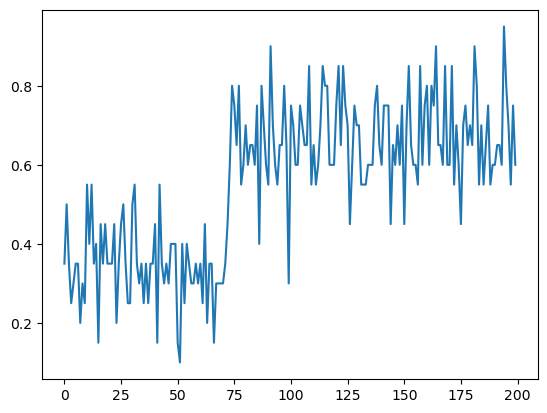

In [4]:
n_trials=200
n_test=20
a=0.01
i=4
h=5
o=3
hit_array=[]

my=mPerceptron(i,h,o,a)

for j in range(n_trials):
    for i in range (len(X_train)):
            my.train(X_train[i],T_train[i])
            
    hit=0
    for i in range (n_test):
        s=np.random.randint(0,29)           
        if((np.argmax(T_test[s])) == (np.argmax(my.test(X_test[s])))):
           hit+=1
    
    hit_array.append(int(hit)/20)

finalhitrate_5 = hit_array[-1]
  
plt.plot(hit_array)
plt.show()

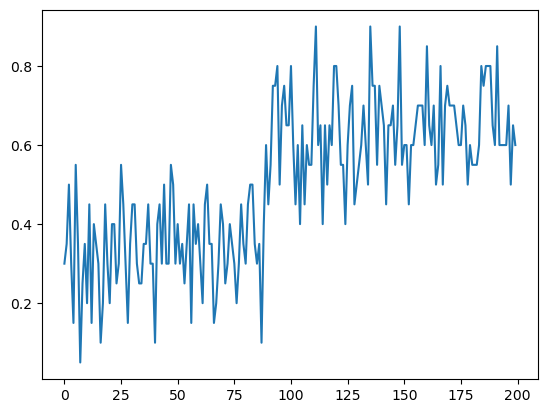

In [5]:
n_trials=200
n_test=20
a=0.01
i=4
h=7
o=3
hit_array=[]

my=mPerceptron(i,h,o,a)

for j in range(n_trials):
    for i in range (len(X_train)):
            my.train(X_train[i],T_train[i])
            
    hit=0
    for i in range (n_test):
        s=np.random.randint(0,29)           
        if((np.argmax(T_test[s])) == (np.argmax(my.test(X_test[s])))):
           hit+=1
    
    hit_array.append(int(hit)/20)

finalhitrate_7 = hit_array[-1]
  
plt.plot(hit_array)
plt.show()

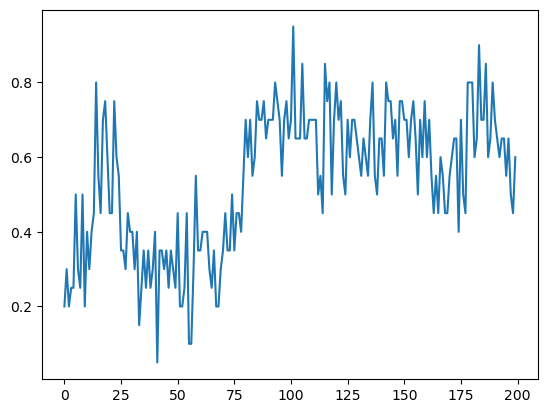

In [6]:
n_trials=200
n_test=20
a=0.01
i=4
h=12
o=3
hit_array=[]

my=mPerceptron(i,h,o,a)

for j in range(n_trials):
    for i in range (len(X_train)):
            my.train(X_train[i],T_train[i])
            
    hit=0
    for i in range (n_test):
        s=np.random.randint(0,29)           
        if((np.argmax(T_test[s])) == (np.argmax(my.test(X_test[s])))):
           hit+=1
    
    hit_array.append(int(hit)/20)

finalhitrate_12 = hit_array[-1]
  
plt.plot(hit_array)
plt.show()

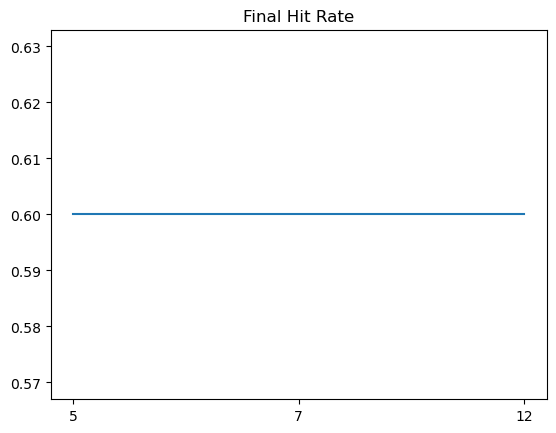

In [7]:
finalHR = []
finalHR.append(finalhitrate_5) # 5 hidden nodes
finalHR.append(finalhitrate_7) # 7 hidden nodes
finalHR.append(finalhitrate_12) # 12 hidden nodes

x = [5, 7, 12]
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, finalHR)
plt.xticks(default_x_ticks, x)

plt.title('Final Hit Rate')
plt.show()